<a href="https://colab.research.google.com/github/tanaysh7/USA_States_Plot/blob/master/Plot_US_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas==0.3.0
# !pip install pyshp==1.2.10
# !pip install shapely==1.6.3
!wget 'https://github.com/tanaysh7/USA_States_Plot/raw/master/Sample_with_States.csv'
!wget 'https://github.com/tanaysh7/USA_States_Plot/raw/master/geo_export_cea5f2de-f4e2-4b99-8bdf-554f49a3744f.dbf'

--2020-04-08 19:14:55--  https://github.com/tanaysh7/USA_States_Plot/raw/master/Sample_with_States.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tanaysh7/USA_States_Plot/master/Sample_with_States.csv [following]
--2020-04-08 19:14:55--  https://raw.githubusercontent.com/tanaysh7/USA_States_Plot/master/Sample_with_States.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856 [text/plain]
Saving to: ‘Sample_with_States.csv.7’

Sample_with_States. 100%[===================>]     856  --.-KB/s    in 0s      

2020-04-08 19:14:55 (120 MB/s) - ‘Sample_with_States.csv.7’ saved [856/856]

--2020-04-08 

In [0]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import pandas as pd

In [0]:
new_data=pd.read_csv('Sample_with_States.csv')
usa = gpd.read_file('geo_export_cea5f2de-f4e2-4b99-8bdf-554f49a3744f.dbf',encoding='utf-8')

In [6]:
#Data can be aggregated to this state
new_data.head()

,State,skinconcern1,skinconcern2,skinconcern3,skinconcern4,skinconcern5
0,AE,3,1,5,4,5
1,AK,4,4,5,5,4
2,AL,5,3,3,1,1
3,AP,1,5,4,2,2
4,AR,5,2,4,4,2


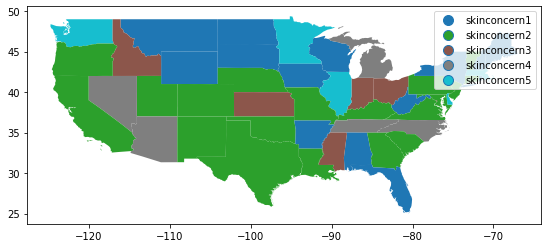

In [4]:
state_has_max_concern=new_data.groupby('State').idxmax(axis=1).droplevel(1)
usa['Metric']=usa.state_abbr.apply(lambda x:str(state_has_max_concern[x]))
usa[~usa.state_abbr.isin(['AK','HI'])].plot(column='Metric',legend=True,figsize=(12,4))
plt.show()

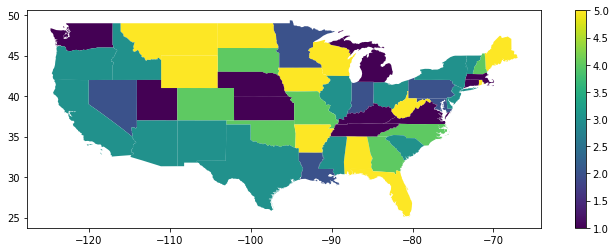

In [5]:
state_mean=new_data.groupby('State').skinconcern1.mean()
usa['SkinConcern']=usa.state_abbr.apply(lambda x:state_mean[x])
usa[~usa.state_abbr.isin(['AK','HI'])].plot(column='SkinConcern',legend=True,figsize=(12,4))
plt.show()